<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/Image_classification_cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
import pandas as pd #data manipulation& analysis
from sklearn import svm #support vector machine
import os #to handle files & dictionary
from skimage.transform import resize #image resizing
from skimage.io import imread #to read image
from sklearn.model_selection import train_test_split #to train and test data

In [20]:
len(os.listdir('/content/drive/MyDrive/Data'))

2

In [21]:
len(os.listdir('/content/drive/MyDrive/Data/Cat'))

70

In [22]:
len(os.listdir('/content/drive/MyDrive/Data/Dog'))

73

In [107]:
catpath=os.path.join('/content/drive/MyDrive/Data','Cat')
for img in os.listdir(catpath):
  print(img)

cat.10.jpg
cat.1.jpg
cat.11.jpg
cat.18.jpg
cat.21.jpg
cat.2.jpg
cat.15.jpg
cat.20.jpg
cat.17.jpg
cat.16.jpg
cat.19.jpg
cat.12.jpg
cat.13.jpg
cat.14.jpg
cat.23.jpg
cat.29.jpg
cat.28.jpg
cat.30.jpg
cat.25.jpg
cat.31.jpg
cat.26.jpg
cat.22.jpg
cat.24.jpg
cat.27.jpg
cat.3.jpg
cat.54.jpg
cat.34.jpg
cat.62.jpg
cat.63.jpg
cat.57.jpg
cat.43.jpg
cat.47.jpg
cat.60.jpg
cat.49.jpg
cat.48.jpg
cat.44.jpg
cat.39.jpg
cat.41.jpg
cat.56.jpg
cat.61.jpg
cat.32.jpg
cat.45.jpg
cat.46.jpg
cat.55.jpg
cat.53.jpg
cat.40.jpg
cat.36.jpg
cat.6.jpg
cat.33.jpg
cat.37.jpg
cat.51.jpg
cat.58.jpg
cat.4.jpg
cat.35.jpg
cat.42.jpg
cat.38.jpg
cat.52.jpg
cat.5.jpg
cat.50.jpg
cat.59.jpg
cat.70.jpg
cat.9.jpg
cat.67.jpg
cat.68.jpg
cat.65.jpg
cat.64.jpg
cat.8.jpg
cat.69.jpg
cat.66.jpg
cat.7.jpg


In [108]:
dogpath=os.path.join('/content/drive/MyDrive/Data','Dog')
for img in os.listdir(dogpath):
  print(img)

dog.125.jpg
dog.139.jpg
dog.131.jpg
dog.114.jpg
dog.130.jpg
dog.104.jpg
dog.119.jpg
dog.109.jpg
dog.103.jpg
dog.135.jpg
dog.128.jpg
dog.140.jpg
dog.127.jpg
dog.121.jpg
dog.132.jpg
dog.101.jpg
dog.100.jpg
dog.136.jpg
dog.102.jpg
dog.120.jpg
dog.116.jpg
dog.108.jpg
dog.117.jpg
dog.124.jpg
dog.110.jpg
dog.123.jpg
dog.111.jpg
dog.118.jpg
dog.134.jpg
dog.129.jpg
dog.133.jpg
dog.137.jpg
dog.115.jpg
dog.106.jpg
dog.122.jpg
dog.138.jpg
dog.112.jpg
dog.126.jpg
dog.105.jpg
dog.107.jpg
dog.113.jpg
dog.84(1).jpg
dog.82.jpg
dog.96.jpg
dog.89.jpg
dog.90(1).jpg
dog.71.jpg
dog.78.jpg
dog.90.jpg
dog.75.jpg
dog.74.jpg
dog.80.jpg
dog.84.jpg
dog.98.jpg
dog.97.jpg
dog.86.jpg
dog.81.jpg
dog.87.jpg
dog.93.jpg
dog.79.jpg
dog.95.jpg
dog.94.jpg
dog.72.jpg
dog.85.jpg
dog.91.jpg
dog.70.jpg
dog.76.jpg
dog.77.jpg
dog.92.jpg
dog.73.jpg
dog.88.jpg
dog.99.jpg
dog.83.jpg


In [32]:
flat_data_arr=[] #
target_arr=[]   # to collect target variables
categories=['Cat','Dog'] #cat indeex=0 dog index=1
data_dir='/content/drive/MyDrive/Data'

In [33]:
for i in categories: #elements iin categoriesd
  print("Loading... categories")
  path=os.path.join(data_dir,i) #loc of data+i=0 so cat,when i is iterated one= dog
  # for img in os.listdir(path)[1:100]:
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img)) # each img from cat_loc  is assigned to img_array
    #resizing all the images into a single size
    img_resize=resize(img_array,(150,150,3)) #height,width,pixel
    #pixel=3== rgb
    flat_data_arr.append(img_resize.flatten()) #flatten converts all images into 1d
    target_arr.append(categories.index(i)) #here index nums is 0,1 stored into target appnd
  print('Loading Categories',i,'Successfully')


Loading... categories
Loading Categories Cat Successfully
Loading... categories
Loading Categories Dog Successfully


In [35]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
#converted in to numpy array
df=pd.DataFrame(flat_data)
print(df)
#[143 rows x 67500 columns] 143 total images
#67500 cols=pixels of the 143 images

        0         1         2         3         4         5         6      \
0    0.112228  0.128223  0.163371  0.068746  0.084741  0.126227  0.088115   
1    0.154919  0.174317  0.159261  0.158661  0.174558  0.170846  0.160470   
2    0.890553  0.917212  0.910823  0.910131  0.948709  0.945972  0.928773   
3    0.451656  0.011537  0.071474  0.451754  0.006647  0.057654  0.470726   
4    0.714892  0.566872  0.364221  0.742174  0.609292  0.426481  0.770887   
..        ...       ...       ...       ...       ...       ...       ...   
138  0.114174  0.125938  0.145546  0.120986  0.132751  0.152359  0.141250   
139  0.742416  0.640047  0.588862  0.749734  0.640349  0.585658  0.747002   
140  0.273563  0.401005  0.240492  0.248680  0.383011  0.216300  0.252576   
141  0.698039  0.698039  0.698039  0.698039  0.698039  0.698039  0.698039   
142  0.335962  0.261452  0.206550  0.346634  0.272124  0.217222  0.341562   

        7         8         9      ...     67490     67491     67492  \
0  

In [36]:
df.shape

(143, 67500)

In [38]:
df['Target']=target

In [40]:
print(df)

            0         1         2         3         4         5         6  \
0    0.112228  0.128223  0.163371  0.068746  0.084741  0.126227  0.088115   
1    0.154919  0.174317  0.159261  0.158661  0.174558  0.170846  0.160470   
2    0.890553  0.917212  0.910823  0.910131  0.948709  0.945972  0.928773   
3    0.451656  0.011537  0.071474  0.451754  0.006647  0.057654  0.470726   
4    0.714892  0.566872  0.364221  0.742174  0.609292  0.426481  0.770887   
..        ...       ...       ...       ...       ...       ...       ...   
138  0.114174  0.125938  0.145546  0.120986  0.132751  0.152359  0.141250   
139  0.742416  0.640047  0.588862  0.749734  0.640349  0.585658  0.747002   
140  0.273563  0.401005  0.240492  0.248680  0.383011  0.216300  0.252576   
141  0.698039  0.698039  0.698039  0.698039  0.698039  0.698039  0.698039   
142  0.335962  0.261452  0.206550  0.346634  0.272124  0.217222  0.341562   

            7         8         9  ...     67491     67492     67493  \
0  

In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [89]:
classifier=svm.SVC()
classifier.fit(xtrain,ytrain)

SVC()

In [90]:
ypred=classifier.predict(xtest)
print(ypred)

[1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 0 1 1 1 1 1]


In [94]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
#here accuracy will be low due to low data collection

0.6511627906976745
              precision    recall  f1-score   support

           0       0.90      0.39      0.55        23
           1       0.58      0.95      0.72        20

    accuracy                           0.65        43
   macro avg       0.74      0.67      0.63        43
weighted avg       0.75      0.65      0.63        43



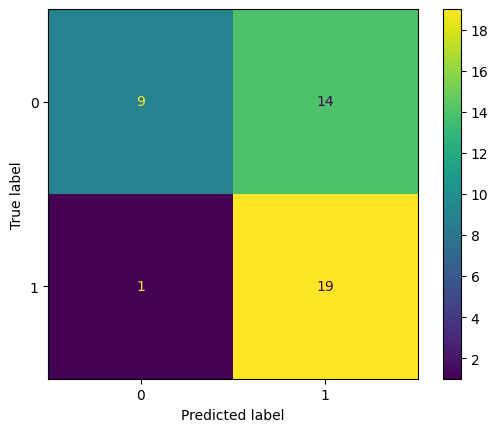

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred)

In [102]:
path='/content/drive/MyDrive/cat.jpeg'
img=imread(path)
image=resize(img,(150,150,3)).flatten().reshape(1,-1) #here reshaped
classifier.predict(image)

array([1])